In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping

from lightgbm import LGBMRegressor
import random
import xgboost as xgb

In [2]:
curr_dir = os.getcwd()
curr_dir

'C:\\weather\\uv_new'

In [3]:
forders_tr = os.listdir(curr_dir+"\\data\\"+"\\uv_train_val")
forders_tr

['uv_train.csv']

In [4]:
df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\uv_train_val\\")+forders_tr[0])

In [5]:
# df[df['yyyymmdd'] == 20210801].index[0]  # 1209883
# df.iloc[df[df['yyyymmdd'] == 20210801].index[0]:]
# df.iloc[:df[df['yyyymmdd'] == 20210801].index[0]]


tr1 = df.iloc[df[df['yyyymmdd'] == 20200501].index[0]:df[df['yyyymmdd'] == 20201101].index[0]]
tr2 = df.iloc[df[df['yyyymmdd'] == 20210501].index[0]:df[df['yyyymmdd'] == 20210801].index[0]]

train1 = pd.concat([tr1,tr2],axis=0)
train1

val1 = df.iloc[df[df['yyyymmdd'] == 20210801].index[0]:df[df['yyyymmdd'] == 20211101].index[0]]
val1

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
1209883,20210801,0,13,126.16000,33.30000,0.0,0.00000,-0.00057,0.00089,-0.00015,...,264.44311,290.55389,288.92546,284.67080,270.70772,127.16116,38.96359,-5.60122,71.00,0
1209884,20210801,0,105,128.89098,37.75147,0.0,-0.00057,-0.00057,0.00000,-0.00015,...,259.14507,283.10942,282.76528,280.43877,268.61000,123.36327,43.95463,-5.09260,26.04,3
1209885,20210801,0,108,126.96500,37.57100,0.0,0.00000,0.00057,-0.00119,0.00120,...,252.93837,273.65182,270.18990,267.15459,258.99048,123.18739,43.77999,-5.07447,85.50,3
1209886,20210801,0,112,126.62490,37.47772,0.0,0.00000,0.00000,-0.00030,-0.00060,...,250.27920,268.14394,268.04466,266.56403,259.34748,123.22507,43.67046,-5.08058,68.99,3
1209887,20210801,0,115,130.89864,37.48129,0.0,0.00000,0.00000,0.00000,-0.00015,...,263.38986,289.67998,288.05013,284.04277,269.26719,123.91259,43.74521,-5.16058,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403209,20211031,2350,146,127.11900,35.84080,0.1,0.00000,-0.00057,0.00030,-0.00015,...,243.98668,261.95199,261.21896,259.29863,250.50021,157.14313,41.81018,-8.56636,62.90,3
1403210,20211031,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,-0.00089,0.00120,...,255.89419,281.48837,281.57322,280.00595,265.73255,157.99342,41.52495,-8.67521,82.00,2
1403211,20211031,2350,156,126.89158,35.17294,0.0,0.00057,0.00000,0.00000,0.00015,...,246.57815,265.43902,264.76641,262.60697,252.65714,157.69250,41.04849,-8.59148,72.38,3
1403212,20211031,2350,159,129.03203,35.10468,0.0,0.00057,0.00000,-0.00179,-0.00060,...,257.75436,284.11394,283.85736,280.96228,265.34129,158.37811,40.96396,-8.68840,69.56,3


In [33]:
# train1[train1['hhnn']==1940]['uv'].value_counts()  #530부터1930(포함)까지 boundary로 체크

0.0    3944
0.1      86
Name: uv, dtype: int64

In [8]:
# set(list(train1['hhnn']))

{0,
 10,
 20,
 30,
 40,
 50,
 100,
 110,
 120,
 130,
 140,
 150,
 200,
 210,
 220,
 230,
 240,
 250,
 300,
 310,
 320,
 330,
 340,
 350,
 400,
 410,
 420,
 430,
 440,
 450,
 500,
 510,
 520,
 530,
 540,
 550,
 600,
 610,
 620,
 630,
 640,
 650,
 700,
 710,
 720,
 730,
 740,
 750,
 800,
 810,
 820,
 830,
 840,
 850,
 900,
 910,
 920,
 930,
 940,
 950,
 1000,
 1010,
 1020,
 1030,
 1040,
 1050,
 1100,
 1110,
 1120,
 1130,
 1140,
 1150,
 1200,
 1210,
 1220,
 1230,
 1240,
 1250,
 1300,
 1310,
 1320,
 1330,
 1340,
 1350,
 1400,
 1410,
 1420,
 1430,
 1440,
 1450,
 1500,
 1510,
 1520,
 1530,
 1540,
 1550,
 1600,
 1610,
 1620,
 1630,
 1640,
 1650,
 1700,
 1710,
 1720,
 1730,
 1740,
 1750,
 1800,
 1810,
 1820,
 1830,
 1840,
 1850,
 1900,
 1910,
 1920,
 1930,
 1940,
 1950,
 2000,
 2010,
 2020,
 2030,
 2040,
 2050,
 2100,
 2110,
 2120,
 2130,
 2140,
 2150,
 2200,
 2210,
 2220,
 2230,
 2240,
 2250,
 2300,
 2310,
 2320,
 2330,
 2340,
 2350}

In [38]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584931 entries, 248259 to 1209882
Data columns (total 27 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   yyyymmdd  584931 non-null  int64  
 1   hhnn      584931 non-null  int64  
 2   stn       584931 non-null  int64  
 3   lon       584931 non-null  float64
 4   lat       584931 non-null  float64
 5   uv        584931 non-null  float64
 6   band1     584931 non-null  float64
 7   band2     584931 non-null  float64
 8   band3     584931 non-null  float64
 9   band4     584931 non-null  float64
 10  band5     584931 non-null  float64
 11  band6     584931 non-null  float64
 12  band7     584931 non-null  float64
 13  band8     584931 non-null  float64
 14  band9     584931 non-null  float64
 15  band10    584931 non-null  float64
 16  band11    584931 non-null  float64
 17  band12    584931 non-null  float64
 18  band13    584931 non-null  float64
 19  band14    584931 non-null  float64
 20

In [82]:
# train1[train1['hhnn']>=530 and train1['hhnn']<=1930]
b1 = train1[train1['hhnn']>=530]
train_b = b1[b1['hhnn']<=1930]
train_b

b2 = val1[val1['hhnn']>=530]
val_b = b2[b2['hhnn']<=1930]
val_b

nb1 = train1[train1['hhnn']<530]
nb11 = train1[train1['hhnn']>1930]
nb11
train_nb = pd.concat([nb1,nb11],axis=0)
train_nb

nb2 = val1[val1['hhnn']<530]
nb22 = val1[val1['hhnn']>1930]
nb22
val_nb = pd.concat([nb2,nb22],axis=0)
val_nb

# d.iloc[248738:]

# train_nb = nb1[nb1['hhnn']>1930]
# train_nb

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
1209883,20210801,0,13,126.16000,33.30000,0.0,0.00000,-0.00057,0.00089,-0.00015,...,264.44311,290.55389,288.92546,284.67080,270.70772,127.16116,38.96359,-5.60122,71.00,0
1209884,20210801,0,105,128.89098,37.75147,0.0,-0.00057,-0.00057,0.00000,-0.00015,...,259.14507,283.10942,282.76528,280.43877,268.61000,123.36327,43.95463,-5.09260,26.04,3
1209885,20210801,0,108,126.96500,37.57100,0.0,0.00000,0.00057,-0.00119,0.00120,...,252.93837,273.65182,270.18990,267.15459,258.99048,123.18739,43.77999,-5.07447,85.50,3
1209886,20210801,0,112,126.62490,37.47772,0.0,0.00000,0.00000,-0.00030,-0.00060,...,250.27920,268.14394,268.04466,266.56403,259.34748,123.22507,43.67046,-5.08058,68.99,3
1209887,20210801,0,115,130.89864,37.48129,0.0,0.00000,0.00000,0.00000,-0.00015,...,263.38986,289.67998,288.05013,284.04277,269.26719,123.91259,43.74521,-5.16058,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403209,20211031,2350,146,127.11900,35.84080,0.1,0.00000,-0.00057,0.00030,-0.00015,...,243.98668,261.95199,261.21896,259.29863,250.50021,157.14313,41.81018,-8.56636,62.90,3
1403210,20211031,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,-0.00089,0.00120,...,255.89419,281.48837,281.57322,280.00595,265.73255,157.99342,41.52495,-8.67521,82.00,2
1403211,20211031,2350,156,126.89158,35.17294,0.0,0.00057,0.00000,0.00000,0.00015,...,246.57815,265.43902,264.76641,262.60697,252.65714,157.69250,41.04849,-8.59148,72.38,3
1403212,20211031,2350,159,129.03203,35.10468,0.0,0.00057,0.00000,-0.00179,-0.00060,...,257.75436,284.11394,283.85736,280.96228,265.34129,158.37811,40.96396,-8.68840,69.56,3


In [91]:
## hhnn 기준 정렬 후 reset_index할 것!!!
train_b = train_b.sort_values(['yyyymmdd', 'hhnn'])
train_b = train_b.reset_index()
train_b = train_b.drop('index', axis=1)
train_b

val_b = val_b.sort_values(['yyyymmdd', 'hhnn'])
val_b = val_b.reset_index()
val_b = val_b.drop('index', axis=1)
val_b

train_nb = train_nb.sort_values(['yyyymmdd', 'hhnn'])
train_nb = train_nb.reset_index()
train_nb = train_nb.drop('index', axis=1)
train_nb

val_nb = val_nb.sort_values(['yyyymmdd', 'hhnn'])
val_nb = val_nb.reset_index()
val_nb = val_nb.drop('index', axis=1)
val_nb

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20210801,0,13,126.16000,33.30000,0.0,0.00000,-0.00057,0.00089,-0.00015,...,264.44311,290.55389,288.92546,284.67080,270.70772,127.16116,38.96359,-5.60122,71.00,0
1,20210801,0,105,128.89098,37.75147,0.0,-0.00057,-0.00057,0.00000,-0.00015,...,259.14507,283.10942,282.76528,280.43877,268.61000,123.36327,43.95463,-5.09260,26.04,3
2,20210801,0,108,126.96500,37.57100,0.0,0.00000,0.00057,-0.00119,0.00120,...,252.93837,273.65182,270.18990,267.15459,258.99048,123.18739,43.77999,-5.07447,85.50,3
3,20210801,0,112,126.62490,37.47772,0.0,0.00000,0.00000,-0.00030,-0.00060,...,250.27920,268.14394,268.04466,266.56403,259.34748,123.22507,43.67046,-5.08058,68.99,3
4,20210801,0,115,130.89864,37.48129,0.0,0.00000,0.00000,0.00000,-0.00015,...,263.38986,289.67998,288.05013,284.04277,269.26719,123.91259,43.74521,-5.16058,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80143,20211031,2350,146,127.11900,35.84080,0.1,0.00000,-0.00057,0.00030,-0.00015,...,243.98668,261.95199,261.21896,259.29863,250.50021,157.14313,41.81018,-8.56636,62.90,3
80144,20211031,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,-0.00089,0.00120,...,255.89419,281.48837,281.57322,280.00595,265.73255,157.99342,41.52495,-8.67521,82.00,2
80145,20211031,2350,156,126.89158,35.17294,0.0,0.00057,0.00000,0.00000,0.00015,...,246.57815,265.43902,264.76641,262.60697,252.65714,157.69250,41.04849,-8.59148,72.38,3
80146,20211031,2350,159,129.03203,35.10468,0.0,0.00057,0.00000,-0.00179,-0.00060,...,257.75436,284.11394,283.85736,280.96228,265.34129,158.37811,40.96396,-8.68840,69.56,3


In [98]:
# 정렬 잘 되었는지 체크

# d = val_nb[val_nb['yyyymmdd']==20210801]
# d[d['hhnn']==520]
# d[d['hhnn']==1940]

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
480,20210801,1940,13,126.16000,33.30000,0.0,0.00283,0.00228,0.00119,0.00105,...,264.51395,289.74645,288.28700,284.22252,270.74181,89.87089,38.96359,1.11358,71.00,0
481,20210801,1940,105,128.89098,37.75147,0.0,0.00340,0.00285,0.00089,-0.00090,...,226.59957,224.55137,224.20061,223.62657,223.08287,90.25124,43.95463,0.98512,26.04,3
482,20210801,1940,108,126.96500,37.57100,0.0,0.00793,0.00684,0.00447,0.00539,...,239.38508,248.31965,247.80702,247.10065,243.36714,88.89862,43.77999,1.21097,85.50,3
483,20210801,1940,112,126.62490,37.47772,0.0,0.00850,0.00684,0.00417,0.00464,...,235.34343,240.92942,240.41163,239.63568,237.16646,88.68134,43.67046,1.24837,68.99,3
484,20210801,1940,115,130.89864,37.48129,0.0,0.00000,0.00057,0.00030,0.00120,...,262.28419,288.70446,286.17948,280.96228,266.10484,91.81346,43.74521,0.73009,222.80,4
485,20210801,1940,131,127.44066,36.63924,0.0,0.00510,0.00399,0.00268,0.00165,...,228.99409,227.74067,226.71267,227.38175,226.63984,89.59838,42.69599,1.11015,58.70,3
486,20210801,1940,132,126.33000,36.54000,0.0,0.00850,0.00627,0.00328,0.00269,...,229.88298,231.67812,231.15040,230.87106,229.78905,88.81675,42.62037,1.24030,47.00,0
487,20210801,1940,133,127.37212,36.37200,0.0,0.00510,0.00456,0.00119,0.00209,...,230.78750,233.09077,232.23323,231.57006,229.86560,89.65719,42.40541,1.10434,68.94,3
488,20210801,1940,138,129.37962,36.03259,0.0,0.00113,0.00114,0.00119,0.00075,...,225.95681,223.56639,222.81025,222.20075,221.82197,91.28680,42.02608,0.84024,2.28,0
489,20210801,1940,143,128.65295,35.87797,0.0,0.00170,0.00114,0.00089,0.00120,...,226.05886,222.76495,220.93595,219.92756,219.43896,90.80473,41.82617,0.92249,53.50,3


In [99]:
forders_te = os.listdir(curr_dir+"\\data\\"+"\\uv_test")
forders_te

['uv_test.csv']

In [100]:
# forders_te = os.listdir(curr_dir+"\\data\\"+"\\test")
# forders_te

df = pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\uv_test\\")+forders_te[0])
# d = list(df.columns)
# for j in range(1,len(d)):
#     d[j] = d[j].replace("202206_uv.", "")
# df.columns = d
# df.drop('Unnamed: 0', axis=1, inplace=True)
test1 = df
test1.describe()
test1

low = test1.columns.str.lower() 
low
test1.columns = low
test1

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20220601,0,13,126.16000,33.30000,NaN,0.00000,0.00000,-0.00060,0.00060,...,241.07130,251.49092,250.11913,248.78686,243.12601,123.72706,38.96359,-5.16304,71.00,0
1,20220601,0,105,128.89098,37.75147,NaN,-0.00057,-0.00057,0.00000,-0.00030,...,244.35010,262.71227,261.14580,257.52658,246.95577,119.74915,43.95463,-4.61100,26.04,3
2,20220601,0,108,126.96500,37.57100,NaN,0.00000,-0.00057,-0.00030,0.00045,...,249.24111,271.81756,270.25616,266.99858,254.94651,119.65871,43.77999,-4.60329,85.50,3
3,20220601,0,112,126.62490,37.47772,NaN,0.00000,0.00000,0.00060,0.00045,...,249.94977,273.52547,272.33661,269.12853,256.15036,119.71313,43.67046,-4.61180,68.99,3
4,20220601,0,115,130.89864,37.48129,NaN,0.00000,0.00000,0.00089,-0.00030,...,239.88321,253.29031,251.46606,249.01625,240.92761,120.21661,43.74521,-4.67107,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,20220625,0,146,127.11900,35.84080,NaN,0.00000,-0.00057,-0.00089,0.00015,...,258.49191,286.87485,287.19605,285.48855,271.35400,119.84431,41.81018,-4.59718,62.90,3
51851,20220625,0,152,129.33472,35.58250,NaN,-0.00057,0.00000,-0.00030,-0.00030,...,263.99872,293.32422,293.51096,291.15861,274.60342,120.42121,41.52495,-4.67124,82.00,2
51852,20220625,0,156,126.89158,35.17294,NaN,0.00000,0.00000,0.00089,-0.00030,...,261.53112,290.14436,290.23278,288.05655,273.15633,120.46896,41.04849,-4.68457,72.38,3
51853,20220625,0,159,129.03203,35.10468,NaN,0.00000,0.00057,0.00030,-0.00075,...,260.95627,287.80066,287.63090,285.01340,270.36623,120.85844,40.96396,-4.73249,69.56,3


In [101]:
b = test1[test1['hhnn']>=530]
test_b = b[b['hhnn']<=1930]
test_b

nb = test1[test1['hhnn']<530]
nb_ = test1[test1['hhnn']>1930]
nb_
test_nb = pd.concat([nb,nb_],axis=0)
test_nb

## hhnn 기준 정렬 후 reset_index할 것!!!
test_b = test_b.sort_values(['yyyymmdd', 'hhnn'])
test_b = test_b.reset_index()
test_b = test_b.drop('index', axis=1)
test_b

test_nb = test_nb.sort_values(['yyyymmdd', 'hhnn'])
test_nb = test_nb.reset_index()
test_nb = test_nb.drop('index', axis=1)
test_nb

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20220601,0,13,126.16000,33.30000,NaN,0.00000,0.00000,-0.00060,0.00060,...,241.07130,251.49092,250.11913,248.78686,243.12601,123.72706,38.96359,-5.16304,71.00,0
1,20220601,0,105,128.89098,37.75147,NaN,-0.00057,-0.00057,0.00000,-0.00030,...,244.35010,262.71227,261.14580,257.52658,246.95577,119.74915,43.95463,-4.61100,26.04,3
2,20220601,0,108,126.96500,37.57100,NaN,0.00000,-0.00057,-0.00030,0.00045,...,249.24111,271.81756,270.25616,266.99858,254.94651,119.65871,43.77999,-4.60329,85.50,3
3,20220601,0,112,126.62490,37.47772,NaN,0.00000,0.00000,0.00060,0.00045,...,249.94977,273.52547,272.33661,269.12853,256.15036,119.71313,43.67046,-4.61180,68.99,3
4,20220601,0,115,130.89864,37.48129,NaN,0.00000,0.00000,0.00089,-0.00030,...,239.88321,253.29031,251.46606,249.01625,240.92761,120.21661,43.74521,-4.67107,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21250,20220625,0,146,127.11900,35.84080,NaN,0.00000,-0.00057,-0.00089,0.00015,...,258.49191,286.87485,287.19605,285.48855,271.35400,119.84431,41.81018,-4.59718,62.90,3
21251,20220625,0,152,129.33472,35.58250,NaN,-0.00057,0.00000,-0.00030,-0.00030,...,263.99872,293.32422,293.51096,291.15861,274.60342,120.42121,41.52495,-4.67124,82.00,2
21252,20220625,0,156,126.89158,35.17294,NaN,0.00000,0.00000,0.00089,-0.00030,...,261.53112,290.14436,290.23278,288.05655,273.15633,120.46896,41.04849,-4.68457,72.38,3
21253,20220625,0,159,129.03203,35.10468,NaN,0.00000,0.00057,0.00030,-0.00075,...,260.95627,287.80066,287.63090,285.01340,270.36623,120.85844,40.96396,-4.73249,69.56,3


<AxesSubplot:>

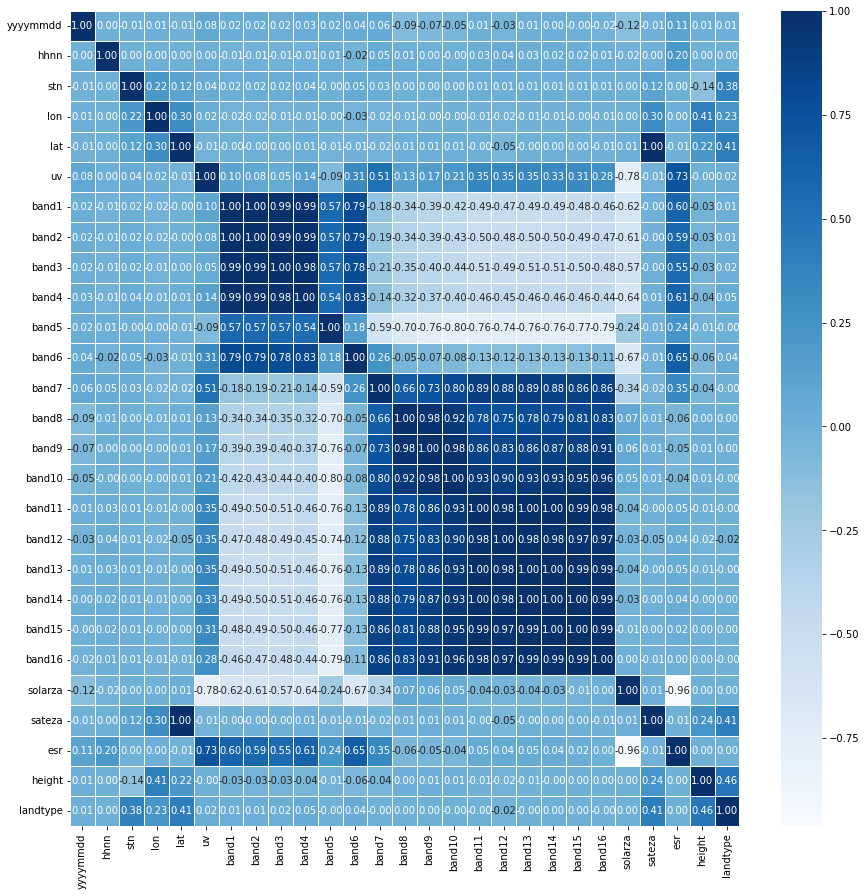

In [111]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train_b.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:>

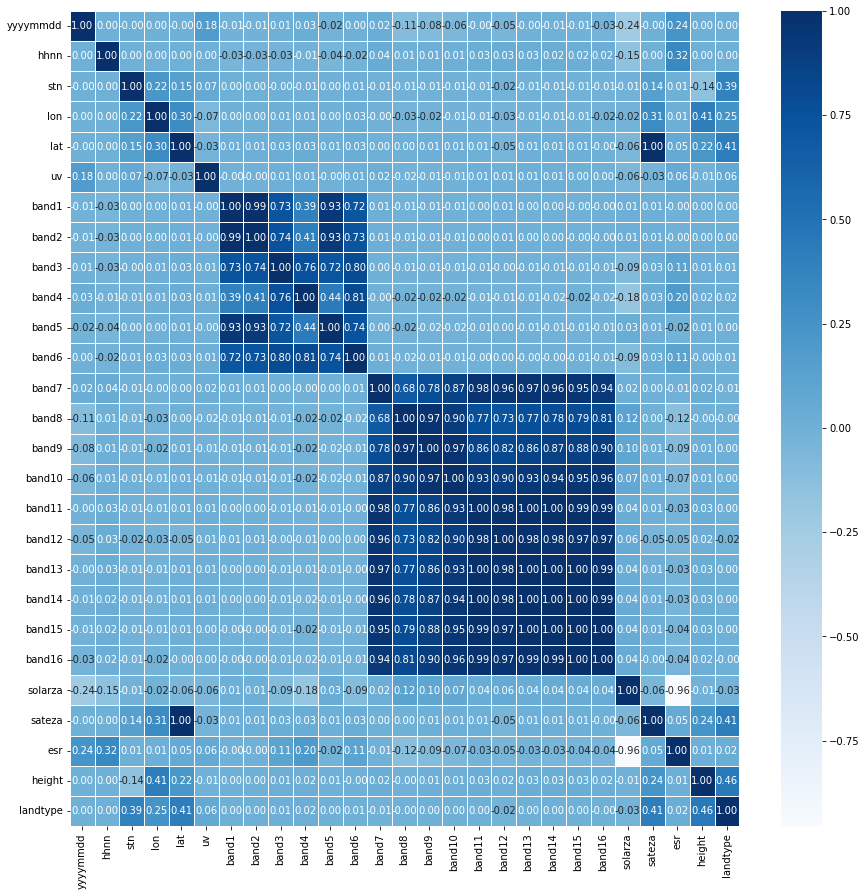

In [112]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train_nb.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# Model

In [113]:
## model_b
X_train = train_b.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'], axis=1)
X_val = val_b.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1)
X_test = test_b.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1)

y_train = train_b[['uv']].values
y_val = val_b[['uv']].values

params = {
    'n_estimators': [500, 1000, 3000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [5, 7, 9, 11], 
#     'colsample_bytree': [0.8, 0.9], 
#     'subsample': [0.8, 0.9],
    'num_leaves':[31]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train, 
          eval_set=[(X_val, y_val)],
          eval_metric=["mse"],
          early_stopping_rounds=200,
          verbose=True)  

C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[1]	valid_0's l2: 5.25182
[2]	valid_0's l2: 4.82413
[3]	valid_0's l2: 4.43905
[4]	valid_0's l2: 4.09404
[5]	valid_0's l2: 3.77573
[6]	valid_0's l2: 3.48281
[7]	valid_0's l2: 3.22678
[8]	valid_0's l2: 2.99222
[9]	valid_0's l2: 2.77562
[10]	valid_0's l2: 2.57755
[11]	valid_0's l2: 2.39851
[12]	valid_0's l2: 2.23716
[13]	valid_0's l2: 2.0918
[14]	valid_0's l2: 1.959
[15]	valid_0's l2: 1.8385
[16]	valid_0's l2: 1.72829
[17]	valid_0's l2: 1.62947
[18]	valid_0's l2: 1.53865
[19]	valid_0's l2: 1.45567
[20]	valid_0's l2: 1.3817
[21]	valid_0's l2: 1.31254
[22]	valid_0's l2: 1.25075
[23]	valid_0's l2: 1.19296
[24]	valid_0's l2: 1.14206
[25]	valid_0's l2: 1.09534
[26]	valid_0's l2: 1.05158
[27]	valid_0's l2: 1.01285
[28]	valid_0's l2: 0.978136
[29]	valid_0's l2: 0.946215
[30]	valid_0's l2: 0.915433
[31]	valid_0's l2: 0.88804
[32]	valid_0's l2: 0.862094
[33]	valid_0's l2: 0.836836
[34]	valid_0's l2: 0.816044
[35]	valid_0's l2: 0.795717
[36]	valid_0's l2: 0.776799
[37]	valid_0's l2: 0.759411
[38]	v

[292]	valid_0's l2: 0.455747
[293]	valid_0's l2: 0.455606
[294]	valid_0's l2: 0.45536
[295]	valid_0's l2: 0.455209
[296]	valid_0's l2: 0.455176
[297]	valid_0's l2: 0.455088
[298]	valid_0's l2: 0.45495
[299]	valid_0's l2: 0.454791
[300]	valid_0's l2: 0.454748
[301]	valid_0's l2: 0.454635
[302]	valid_0's l2: 0.454571
[303]	valid_0's l2: 0.454564
[304]	valid_0's l2: 0.454437
[305]	valid_0's l2: 0.454469
[306]	valid_0's l2: 0.454213
[307]	valid_0's l2: 0.454103
[308]	valid_0's l2: 0.454034
[309]	valid_0's l2: 0.453853
[310]	valid_0's l2: 0.453723
[311]	valid_0's l2: 0.453649
[312]	valid_0's l2: 0.45354
[313]	valid_0's l2: 0.45352
[314]	valid_0's l2: 0.453425
[315]	valid_0's l2: 0.453336
[316]	valid_0's l2: 0.453134
[317]	valid_0's l2: 0.453104
[318]	valid_0's l2: 0.453032
[319]	valid_0's l2: 0.452857
[320]	valid_0's l2: 0.452704
[321]	valid_0's l2: 0.452606
[322]	valid_0's l2: 0.452539
[323]	valid_0's l2: 0.452551
[324]	valid_0's l2: 0.452403
[325]	valid_0's l2: 0.452346
[326]	valid_0's l2

[578]	valid_0's l2: 0.439593
[579]	valid_0's l2: 0.439618
[580]	valid_0's l2: 0.439515
[581]	valid_0's l2: 0.439462
[582]	valid_0's l2: 0.439386
[583]	valid_0's l2: 0.439416
[584]	valid_0's l2: 0.439411
[585]	valid_0's l2: 0.439426
[586]	valid_0's l2: 0.439403
[587]	valid_0's l2: 0.439376
[588]	valid_0's l2: 0.439366
[589]	valid_0's l2: 0.439339
[590]	valid_0's l2: 0.439275
[591]	valid_0's l2: 0.439251
[592]	valid_0's l2: 0.439251
[593]	valid_0's l2: 0.439226
[594]	valid_0's l2: 0.43917
[595]	valid_0's l2: 0.439169
[596]	valid_0's l2: 0.439211
[597]	valid_0's l2: 0.439149
[598]	valid_0's l2: 0.439099
[599]	valid_0's l2: 0.439154
[600]	valid_0's l2: 0.439102
[601]	valid_0's l2: 0.439126
[602]	valid_0's l2: 0.439109
[603]	valid_0's l2: 0.439111
[604]	valid_0's l2: 0.439037
[605]	valid_0's l2: 0.439008
[606]	valid_0's l2: 0.43902
[607]	valid_0's l2: 0.438992
[608]	valid_0's l2: 0.438996
[609]	valid_0's l2: 0.438962
[610]	valid_0's l2: 0.438984
[611]	valid_0's l2: 0.43893
[612]	valid_0's l

[868]	valid_0's l2: 0.435167
[869]	valid_0's l2: 0.435111
[870]	valid_0's l2: 0.435109
[871]	valid_0's l2: 0.435069
[872]	valid_0's l2: 0.435083
[873]	valid_0's l2: 0.435049
[874]	valid_0's l2: 0.435023
[875]	valid_0's l2: 0.435
[876]	valid_0's l2: 0.434973
[877]	valid_0's l2: 0.434993
[878]	valid_0's l2: 0.435012
[879]	valid_0's l2: 0.434938
[880]	valid_0's l2: 0.434915
[881]	valid_0's l2: 0.434927
[882]	valid_0's l2: 0.434901
[883]	valid_0's l2: 0.43488
[884]	valid_0's l2: 0.434833
[885]	valid_0's l2: 0.434767
[886]	valid_0's l2: 0.434746
[887]	valid_0's l2: 0.434796
[888]	valid_0's l2: 0.434767
[889]	valid_0's l2: 0.434796
[890]	valid_0's l2: 0.434714
[891]	valid_0's l2: 0.434687
[892]	valid_0's l2: 0.434602
[893]	valid_0's l2: 0.434607
[894]	valid_0's l2: 0.434578
[895]	valid_0's l2: 0.434583
[896]	valid_0's l2: 0.434462
[897]	valid_0's l2: 0.434455
[898]	valid_0's l2: 0.434475
[899]	valid_0's l2: 0.434478
[900]	valid_0's l2: 0.434489
[901]	valid_0's l2: 0.434505
[902]	valid_0's l2

[1152]	valid_0's l2: 0.432702
[1153]	valid_0's l2: 0.432716
[1154]	valid_0's l2: 0.432708
[1155]	valid_0's l2: 0.432739
[1156]	valid_0's l2: 0.432745
[1157]	valid_0's l2: 0.432733
[1158]	valid_0's l2: 0.432698
[1159]	valid_0's l2: 0.432711
[1160]	valid_0's l2: 0.432705
[1161]	valid_0's l2: 0.432696
[1162]	valid_0's l2: 0.432667
[1163]	valid_0's l2: 0.432654
[1164]	valid_0's l2: 0.432632
[1165]	valid_0's l2: 0.432628
[1166]	valid_0's l2: 0.432616
[1167]	valid_0's l2: 0.432609
[1168]	valid_0's l2: 0.4326
[1169]	valid_0's l2: 0.432593
[1170]	valid_0's l2: 0.432587
[1171]	valid_0's l2: 0.432572
[1172]	valid_0's l2: 0.432595
[1173]	valid_0's l2: 0.432564
[1174]	valid_0's l2: 0.432559
[1175]	valid_0's l2: 0.432555
[1176]	valid_0's l2: 0.432547
[1177]	valid_0's l2: 0.432536
[1178]	valid_0's l2: 0.432524
[1179]	valid_0's l2: 0.43253
[1180]	valid_0's l2: 0.432538
[1181]	valid_0's l2: 0.432513
[1182]	valid_0's l2: 0.432503
[1183]	valid_0's l2: 0.432528
[1184]	valid_0's l2: 0.432544
[1185]	valid_

[1436]	valid_0's l2: 0.431265
[1437]	valid_0's l2: 0.431256
[1438]	valid_0's l2: 0.431248
[1439]	valid_0's l2: 0.431249
[1440]	valid_0's l2: 0.431249
[1441]	valid_0's l2: 0.431217
[1442]	valid_0's l2: 0.431227
[1443]	valid_0's l2: 0.431196
[1444]	valid_0's l2: 0.431193
[1445]	valid_0's l2: 0.431196
[1446]	valid_0's l2: 0.431183
[1447]	valid_0's l2: 0.431186
[1448]	valid_0's l2: 0.43118
[1449]	valid_0's l2: 0.431196
[1450]	valid_0's l2: 0.431186
[1451]	valid_0's l2: 0.431168
[1452]	valid_0's l2: 0.431166
[1453]	valid_0's l2: 0.431151
[1454]	valid_0's l2: 0.431141
[1455]	valid_0's l2: 0.431146
[1456]	valid_0's l2: 0.431182
[1457]	valid_0's l2: 0.431175
[1458]	valid_0's l2: 0.431189
[1459]	valid_0's l2: 0.431176
[1460]	valid_0's l2: 0.431161
[1461]	valid_0's l2: 0.431158
[1462]	valid_0's l2: 0.431095
[1463]	valid_0's l2: 0.431088
[1464]	valid_0's l2: 0.431091
[1465]	valid_0's l2: 0.431095
[1466]	valid_0's l2: 0.431094
[1467]	valid_0's l2: 0.43104
[1468]	valid_0's l2: 0.431032
[1469]	valid

[1711]	valid_0's l2: 0.430058
[1712]	valid_0's l2: 0.430005
[1713]	valid_0's l2: 0.43
[1714]	valid_0's l2: 0.429995
[1715]	valid_0's l2: 0.429978
[1716]	valid_0's l2: 0.429973
[1717]	valid_0's l2: 0.429966
[1718]	valid_0's l2: 0.429969
[1719]	valid_0's l2: 0.429969
[1720]	valid_0's l2: 0.429959
[1721]	valid_0's l2: 0.429951
[1722]	valid_0's l2: 0.429939
[1723]	valid_0's l2: 0.429944
[1724]	valid_0's l2: 0.429961
[1725]	valid_0's l2: 0.429988
[1726]	valid_0's l2: 0.429956
[1727]	valid_0's l2: 0.42997
[1728]	valid_0's l2: 0.429977
[1729]	valid_0's l2: 0.430003
[1730]	valid_0's l2: 0.429973
[1731]	valid_0's l2: 0.429959
[1732]	valid_0's l2: 0.429962
[1733]	valid_0's l2: 0.429961
[1734]	valid_0's l2: 0.429949
[1735]	valid_0's l2: 0.429948
[1736]	valid_0's l2: 0.429944
[1737]	valid_0's l2: 0.429938
[1738]	valid_0's l2: 0.429926
[1739]	valid_0's l2: 0.429903
[1740]	valid_0's l2: 0.429912
[1741]	valid_0's l2: 0.429927
[1742]	valid_0's l2: 0.429926
[1743]	valid_0's l2: 0.429937
[1744]	valid_0'

[1987]	valid_0's l2: 0.429277
[1988]	valid_0's l2: 0.429245
[1989]	valid_0's l2: 0.42925
[1990]	valid_0's l2: 0.429235
[1991]	valid_0's l2: 0.429226
[1992]	valid_0's l2: 0.429218
[1993]	valid_0's l2: 0.429252
[1994]	valid_0's l2: 0.429251
[1995]	valid_0's l2: 0.429249
[1996]	valid_0's l2: 0.429262
[1997]	valid_0's l2: 0.429261
[1998]	valid_0's l2: 0.42927
[1999]	valid_0's l2: 0.429271
[2000]	valid_0's l2: 0.429281
[2001]	valid_0's l2: 0.429258
[2002]	valid_0's l2: 0.429257
[2003]	valid_0's l2: 0.429262
[2004]	valid_0's l2: 0.429263
[2005]	valid_0's l2: 0.429279
[2006]	valid_0's l2: 0.429286
[2007]	valid_0's l2: 0.429294
[2008]	valid_0's l2: 0.42929
[2009]	valid_0's l2: 0.42928
[2010]	valid_0's l2: 0.429272
[2011]	valid_0's l2: 0.429269
[2012]	valid_0's l2: 0.429246
[2013]	valid_0's l2: 0.42924
[2014]	valid_0's l2: 0.429234
[2015]	valid_0's l2: 0.429239
[2016]	valid_0's l2: 0.429246
[2017]	valid_0's l2: 0.429235
[2018]	valid_0's l2: 0.429235
[2019]	valid_0's l2: 0.429241
[2020]	valid_0'

[2263]	valid_0's l2: 0.428787
[2264]	valid_0's l2: 0.428768
[2265]	valid_0's l2: 0.428761
[2266]	valid_0's l2: 0.428794
[2267]	valid_0's l2: 0.428754
[2268]	valid_0's l2: 0.428736
[2269]	valid_0's l2: 0.428734
[2270]	valid_0's l2: 0.428739
[2271]	valid_0's l2: 0.428751
[2272]	valid_0's l2: 0.428727
[2273]	valid_0's l2: 0.428736
[2274]	valid_0's l2: 0.428732
[2275]	valid_0's l2: 0.428725
[2276]	valid_0's l2: 0.428736
[2277]	valid_0's l2: 0.428759
[2278]	valid_0's l2: 0.428763
[2279]	valid_0's l2: 0.42875
[2280]	valid_0's l2: 0.42874
[2281]	valid_0's l2: 0.428741
[2282]	valid_0's l2: 0.428753
[2283]	valid_0's l2: 0.428703
[2284]	valid_0's l2: 0.428694
[2285]	valid_0's l2: 0.428696
[2286]	valid_0's l2: 0.428644
[2287]	valid_0's l2: 0.42863
[2288]	valid_0's l2: 0.42863
[2289]	valid_0's l2: 0.428626
[2290]	valid_0's l2: 0.428629
[2291]	valid_0's l2: 0.428596
[2292]	valid_0's l2: 0.428608
[2293]	valid_0's l2: 0.428596
[2294]	valid_0's l2: 0.428604
[2295]	valid_0's l2: 0.428583
[2296]	valid_0

[2541]	valid_0's l2: 0.428275
[2542]	valid_0's l2: 0.428276
[2543]	valid_0's l2: 0.428265
[2544]	valid_0's l2: 0.428265
[2545]	valid_0's l2: 0.428276
[2546]	valid_0's l2: 0.428269
[2547]	valid_0's l2: 0.428277
[2548]	valid_0's l2: 0.428272
[2549]	valid_0's l2: 0.428279
[2550]	valid_0's l2: 0.428284
[2551]	valid_0's l2: 0.428282
[2552]	valid_0's l2: 0.428267
[2553]	valid_0's l2: 0.428257
[2554]	valid_0's l2: 0.428259
[2555]	valid_0's l2: 0.428227
[2556]	valid_0's l2: 0.428223
[2557]	valid_0's l2: 0.428213
[2558]	valid_0's l2: 0.428211
[2559]	valid_0's l2: 0.428218
[2560]	valid_0's l2: 0.428218
[2561]	valid_0's l2: 0.428228
[2562]	valid_0's l2: 0.428225
[2563]	valid_0's l2: 0.428236
[2564]	valid_0's l2: 0.428239
[2565]	valid_0's l2: 0.428237
[2566]	valid_0's l2: 0.428232
[2567]	valid_0's l2: 0.428226
[2568]	valid_0's l2: 0.428199
[2569]	valid_0's l2: 0.428195
[2570]	valid_0's l2: 0.428198
[2571]	valid_0's l2: 0.428183
[2572]	valid_0's l2: 0.42818
[2573]	valid_0's l2: 0.428178
[2574]	vali

[2820]	valid_0's l2: 0.427961
[2821]	valid_0's l2: 0.42797
[2822]	valid_0's l2: 0.427968
[2823]	valid_0's l2: 0.427973
[2824]	valid_0's l2: 0.427958
[2825]	valid_0's l2: 0.42797
[2826]	valid_0's l2: 0.427982
[2827]	valid_0's l2: 0.427963
[2828]	valid_0's l2: 0.427992
[2829]	valid_0's l2: 0.427986
[2830]	valid_0's l2: 0.427983
[2831]	valid_0's l2: 0.427982
[2832]	valid_0's l2: 0.427971
[2833]	valid_0's l2: 0.427969
[2834]	valid_0's l2: 0.427939
[2835]	valid_0's l2: 0.427922
[2836]	valid_0's l2: 0.427921
[2837]	valid_0's l2: 0.427909
[2838]	valid_0's l2: 0.427904
[2839]	valid_0's l2: 0.427905
[2840]	valid_0's l2: 0.427907
[2841]	valid_0's l2: 0.427914
[2842]	valid_0's l2: 0.427903
[2843]	valid_0's l2: 0.42794
[2844]	valid_0's l2: 0.42797
[2845]	valid_0's l2: 0.427968
[2846]	valid_0's l2: 0.427969
[2847]	valid_0's l2: 0.427973
[2848]	valid_0's l2: 0.427978
[2849]	valid_0's l2: 0.427984
[2850]	valid_0's l2: 0.427974
[2851]	valid_0's l2: 0.427958
[2852]	valid_0's l2: 0.427961
[2853]	valid_0

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [5, 7, 9, 11],
                         'n_estimators': [500, 1000, 3000],
                         'num_leaves': [31]})

In [114]:
print(grid_search.best_score_)
print(grid_search)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.9019237893665951
GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [5, 7, 9, 11],
                         'n_estimators': [500, 1000, 3000],
                         'num_leaves': [31]})
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 3000, 'num_leaves': 31}
LGBMRegressor(learning_rate=0.05, max_depth=5, n_estimators=3000)


In [115]:
import joblib

#save your model or results
joblib.dump(grid_search, 'lgbm_gs1_time_b.pkl')

# #load your model for further usage
# joblib.load("model_file_name.pkl")

model_b = joblib.load("lgbm_gs1_time_b.pkl")
model_b

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [5, 7, 9, 11],
                         'n_estimators': [500, 1000, 3000],
                         'num_leaves': [31]})

In [118]:
pred_b = model_b.predict(X_test)
pred_b
np.save('pred_b.npy',pred_b)

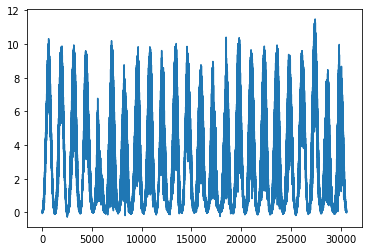

In [122]:
# p = np.load('pred_b.npy')
# p
# plt.plot(p)

In [123]:
## model_nb
X_train1 = train_nb.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'], axis=1)
X_val1 = val_nb.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1)
X_test1 = test_nb.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1)

y_train1 = train_nb[['uv']].values
y_val1 = val_nb[['uv']].values

params = {
    'n_estimators': [500, 1000, 3000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [5, 7, 9, 11], 
#     'colsample_bytree': [0.8, 0.9], 
#     'subsample': [0.8, 0.9],
    'num_leaves':[31]
}

from sklearn.model_selection import GridSearchCV

grid_search1 = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1)
grid_search1.fit(X_train1, y_train1, 
          eval_set=[(X_val1, y_val1)],
          eval_metric=["mse"],
          early_stopping_rounds=200,
          verbose=True) 

C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[1]	valid_0's l2: 0.000645455
[2]	valid_0's l2: 0.000643801
[3]	valid_0's l2: 0.000642171
[4]	valid_0's l2: 0.000640567
[5]	valid_0's l2: 0.00063901
[6]	valid_0's l2: 0.000637469
[7]	valid_0's l2: 0.000635924
[8]	valid_0's l2: 0.000634431
[9]	valid_0's l2: 0.000632942
[10]	valid_0's l2: 0.000631493
[11]	valid_0's l2: 0.000630072
[12]	valid_0's l2: 0.000628704
[13]	valid_0's l2: 0.000627343
[14]	valid_0's l2: 0.000626063
[15]	valid_0's l2: 0.000624738
[16]	valid_0's l2: 0.00062343
[17]	valid_0's l2: 0.000622242
[18]	valid_0's l2: 0.000620976
[19]	valid_0's l2: 0.00061977
[20]	valid_0's l2: 0.000618599
[21]	valid_0's l2: 0.000617394
[22]	valid_0's l2: 0.000616191
[23]	valid_0's l2: 0.00061498
[24]	valid_0's l2: 0.000613876
[25]	valid_0's l2: 0.000612774
[26]	valid_0's l2: 0.00061165
[27]	valid_0's l2: 0.000610497
[28]	valid_0's l2: 0.000609347
[29]	valid_0's l2: 0.000608299
[30]	valid_0's l2: 0.000607221
[31]	valid_0's l2: 0.000606092
[32]	valid_0's l2: 0.000605035
[33]	valid_0's l2: 0.0

[268]	valid_0's l2: 0.000531867
[269]	valid_0's l2: 0.000531807
[270]	valid_0's l2: 0.00053173
[271]	valid_0's l2: 0.000531696
[272]	valid_0's l2: 0.00053168
[273]	valid_0's l2: 0.000531513
[274]	valid_0's l2: 0.000531393
[275]	valid_0's l2: 0.000531389
[276]	valid_0's l2: 0.00053124
[277]	valid_0's l2: 0.000531122
[278]	valid_0's l2: 0.000530966
[279]	valid_0's l2: 0.000530935
[280]	valid_0's l2: 0.000530864
[281]	valid_0's l2: 0.000530942
[282]	valid_0's l2: 0.000530893
[283]	valid_0's l2: 0.000530786
[284]	valid_0's l2: 0.000530687
[285]	valid_0's l2: 0.000530683
[286]	valid_0's l2: 0.000530583
[287]	valid_0's l2: 0.000530544
[288]	valid_0's l2: 0.000530543
[289]	valid_0's l2: 0.000530447
[290]	valid_0's l2: 0.000530335
[291]	valid_0's l2: 0.00053035
[292]	valid_0's l2: 0.000530235
[293]	valid_0's l2: 0.000530246
[294]	valid_0's l2: 0.000530214
[295]	valid_0's l2: 0.000530229
[296]	valid_0's l2: 0.000530102
[297]	valid_0's l2: 0.00053012
[298]	valid_0's l2: 0.000530021
[299]	valid_0

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [5, 7, 9, 11],
                         'n_estimators': [500, 1000, 3000],
                         'num_leaves': [31]})

In [124]:
print(grid_search1.best_score_)
print(grid_search1)
print(grid_search1.best_params_)
print(grid_search1.best_estimator_)

-22.729923921537488
GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [5, 7, 9, 11],
                         'n_estimators': [500, 1000, 3000],
                         'num_leaves': [31]})
{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500, 'num_leaves': 31}
LGBMRegressor(learning_rate=0.01, max_depth=9, n_estimators=500)


In [125]:
import joblib

#save your model or results
joblib.dump(grid_search1, 'lgbm_gs1_time_nb.pkl')

# #load your model for further usage
# joblib.load("model_file_name.pkl")

model_nb = joblib.load("lgbm_gs1_time_nb.pkl")
model_nb

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [5, 7, 9, 11],
                         'n_estimators': [500, 1000, 3000],
                         'num_leaves': [31]})

In [126]:
pred_nb = model_nb.predict(X_test1)
pred_nb

array([4.29648630e-05, 3.56420489e-05, 2.89003716e-05, ...,
       1.94481392e-05, 3.11282783e-05, 1.96489249e-05])

In [127]:
np.save('pred_nb.npy',pred_nb)

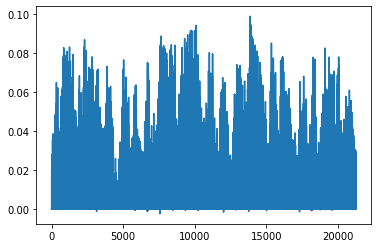

In [131]:
p = np.load('pred_nb.npy')
p
plt.plot(p)

In [ ]:
## submission b,nb 나누어 정렬 후 값 넣기.

In [135]:
test1

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20220601,0,13,126.16000,33.30000,NaN,0.00000,0.00000,-0.00060,0.00060,...,241.07130,251.49092,250.11913,248.78686,243.12601,123.72706,38.96359,-5.16304,71.00,0
1,20220601,0,105,128.89098,37.75147,NaN,-0.00057,-0.00057,0.00000,-0.00030,...,244.35010,262.71227,261.14580,257.52658,246.95577,119.74915,43.95463,-4.61100,26.04,3
2,20220601,0,108,126.96500,37.57100,NaN,0.00000,-0.00057,-0.00030,0.00045,...,249.24111,271.81756,270.25616,266.99858,254.94651,119.65871,43.77999,-4.60329,85.50,3
3,20220601,0,112,126.62490,37.47772,NaN,0.00000,0.00000,0.00060,0.00045,...,249.94977,273.52547,272.33661,269.12853,256.15036,119.71313,43.67046,-4.61180,68.99,3
4,20220601,0,115,130.89864,37.48129,NaN,0.00000,0.00000,0.00089,-0.00030,...,239.88321,253.29031,251.46606,249.01625,240.92761,120.21661,43.74521,-4.67107,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,20220625,0,146,127.11900,35.84080,NaN,0.00000,-0.00057,-0.00089,0.00015,...,258.49191,286.87485,287.19605,285.48855,271.35400,119.84431,41.81018,-4.59718,62.90,3
51851,20220625,0,152,129.33472,35.58250,NaN,-0.00057,0.00000,-0.00030,-0.00030,...,263.99872,293.32422,293.51096,291.15861,274.60342,120.42121,41.52495,-4.67124,82.00,2
51852,20220625,0,156,126.89158,35.17294,NaN,0.00000,0.00000,0.00089,-0.00030,...,261.53112,290.14436,290.23278,288.05655,273.15633,120.46896,41.04849,-4.68457,72.38,3
51853,20220625,0,159,129.03203,35.10468,NaN,0.00000,0.00057,0.00030,-0.00075,...,260.95627,287.80066,287.63090,285.01340,270.36623,120.85844,40.96396,-4.73249,69.56,3


In [136]:
submission=pd.read_csv('1-1_검증데이터셋.csv', encoding='utf-8')
submission1=submission.copy()
submission1

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,NaN
1,202206010000,105,NaN
2,202206010000,108,NaN
3,202206010000,112,NaN
4,202206010000,115,NaN
...,...,...,...
51850,202206250000,146,NaN
51851,202206250000,152,NaN
51852,202206250000,156,NaN
51853,202206250000,159,NaN


In [ ]:
# b = test1[test1['hhnn']>=530]
# test_b = b[b['hhnn']<=1930]
# test_b

# nb = test1[test1['hhnn']<530]
# nb_ = test1[test1['hhnn']>1930]
# nb_
# test_nb = pd.concat([nb,nb_],axis=0)
# test_nb

# ## hhnn 기준 정렬 후 reset_index할 것!!!
# test_b = test_b.sort_values(['yyyymmdd', 'hhnn'])
# test_b = test_b.reset_index()
# test_b = test_b.drop('index', axis=1)
# test_b

# test_nb = test_nb.sort_values(['yyyymmdd', 'hhnn'])
# test_nb = test_nb.reset_index()
# test_nb = test_nb.drop('index', axis=1)
# test_nb



In [161]:
# submission1.loc[[2,22]]

b = test1[test1['hhnn']>=530]
test_b = b[b['hhnn']<=1930]
test_b.index

d = submission1.loc[test_b.index]
d['UV'] = pred_b
d

nb = test1[test1['hhnn']<530]
nb_ = test1[test1['hhnn']>1930]
test_nb = pd.concat([nb,nb_],axis=0)
test_nb.index

d1 = submission1.loc[test_nb.index]
d1['UV'] = pred_nb
d1

dd = pd.concat([d,d1])

In [162]:
dd = dd.sort_values(['YearMonthDayHourMinute', 'STN'])
dd = dd.reset_index()
sub = dd.drop('index', axis=1)
sub

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,0.000043
1,202206010000,105,0.000036
2,202206010000,108,0.000029
3,202206010000,112,0.000031
4,202206010000,115,0.000037
...,...,...,...
51850,202206250000,146,0.050650
51851,202206250000,152,0.000007
51852,202206250000,156,0.000049
51853,202206250000,159,0.000017


In [168]:
sub.to_csv('220224_lgbm_uv_nooutlier_summer1_gs1_time.csv', index=False)

<AxesSubplot:>

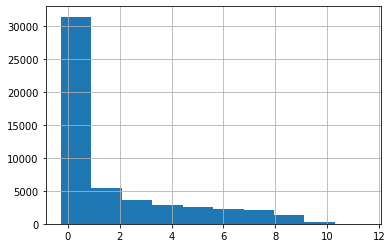

In [164]:
sub['UV'].hist()      

# 아래는 비율 확인한 것

In [165]:
li = list(sub['UV'].values)
li
li_neg = []
li_0_1=[]
li_1_2=[]
li_2_3=[]
li_3_4=[]
li_4_5=[]
li_5_6=[]
li_6_7=[]
li_7_8=[]
li_8_9=[]
li_9_10=[]
li_10_11=[]
li_11_12=[]
li_12_13=[]
li_13_=[]
for i in range(len(li)):
    if li[i]<0:
        li_neg.append(li[i])
    elif (li[i]>=0 and li[i]<1):
        li_0_1.append(li[i])
    elif (li[i]>=1 and li[i]<2):
        li_1_2.append(li[i])
    elif (li[i]>=2 and li[i]<3):
        li_2_3.append(li[i])
    elif (li[i]>=3 and li[i]<4):
        li_3_4.append(li[i])
    elif (li[i]>=4 and li[i]<5):
        li_4_5.append(li[i])
    elif (li[i]>=5 and li[i]<6):
        li_5_6.append(li[i])
    elif (li[i]>=6 and li[i]<7):
        li_6_7.append(li[i])
    elif (li[i]>=7 and li[i]<8):
        li_7_8.append(li[i])
    elif (li[i]>=8 and li[i]<9):
        li_8_9.append(li[i])
    elif (li[i]>=9 and li[i]<10):
        li_9_10.append(li[i])
    elif (li[i]>=10 and li[i]<11):
        li_10_11.append(li[i])
    elif (li[i]>=11 and li[i]<12):
        li_11_12.append(li[i])
    elif (li[i]>=12 and li[i]<13):
        li_12_13.append(li[i])
    elif li[i]>=13:
        li_13_.append(li[i])
        
# df11_num = pd.DataFrame([len(li_0_1),len(li_1_2),len(li_2_3),len(li_3_4),len(li_4_5),len(li_5_6),\
#                         len(li_6_7),len(li_7_8),len(li_8_9),len(li_9_10),len(li_10_11),len(li_11_12),len(li_12_13),\
#                         len(li_13_)])
# df11_num

df11_ratio = pd.DataFrame([100*len(li_neg)/len(li), 100*len(li_0_1)/len(li), 100*len(li_1_2)/len(li), 100*len(li_2_3)/len(li),\
                         100*len(li_3_4)/len(li), 100*len(li_4_5)/len(li), 100*len(li_5_6)/len(li), \
                          100*len(li_6_7)/len(li),100*len(li_7_8)/len(li),100*len(li_8_9)/len(li),100*len(li_9_10)/len(li),\
                          100*len(li_10_11)/len(li),100*len(li_11_12)/len(li),100*len(li_12_13)/len(li),\
                          100*len(li_13_)/len(li)])
df11_ratio

# df11_1 = pd.concat([df11_num,df11_ratio],axis=1)
df11_ratio.columns = ['_ratio']
df11_ratio.index = ['neg','0_1','1_2','2_3','3_4','4_5','5_6','6_7','7_8','8_9','9_10','10_11','11_12','12_13','13_']
df11_ratio

,_ratio
neg,3.075885
0_1,58.652010
1_2,8.760968
2_3,6.080417
3_4,5.137402
4_5,4.225243
5_6,4.005400
6_7,3.671777
7_8,3.301514
8_9,2.269791


In [166]:
df = pd.read_csv('220224_lgbm_uv_nooutlier_summer1_gs1.csv')
ff = df['UV'].values

In [167]:
li = list(ff)
li
li_neg = []
li_0_1=[]
li_1_2=[]
li_2_3=[]
li_3_4=[]
li_4_5=[]
li_5_6=[]
li_6_7=[]
li_7_8=[]
li_8_9=[]
li_9_10=[]
li_10_11=[]
li_11_12=[]
li_12_13=[]
li_13_=[]
for i in range(len(li)):
    if li[i]<0:
        li_neg.append(li[i])
    elif (li[i]>=0 and li[i]<1):
        li_0_1.append(li[i])
    elif (li[i]>=1 and li[i]<2):
        li_1_2.append(li[i])
    elif (li[i]>=2 and li[i]<3):
        li_2_3.append(li[i])
    elif (li[i]>=3 and li[i]<4):
        li_3_4.append(li[i])
    elif (li[i]>=4 and li[i]<5):
        li_4_5.append(li[i])
    elif (li[i]>=5 and li[i]<6):
        li_5_6.append(li[i])
    elif (li[i]>=6 and li[i]<7):
        li_6_7.append(li[i])
    elif (li[i]>=7 and li[i]<8):
        li_7_8.append(li[i])
    elif (li[i]>=8 and li[i]<9):
        li_8_9.append(li[i])
    elif (li[i]>=9 and li[i]<10):
        li_9_10.append(li[i])
    elif (li[i]>=10 and li[i]<11):
        li_10_11.append(li[i])
    elif (li[i]>=11 and li[i]<12):
        li_11_12.append(li[i])
    elif (li[i]>=12 and li[i]<13):
        li_12_13.append(li[i])
    elif li[i]>=13:
        li_13_.append(li[i])
        
# df11_num = pd.DataFrame([len(li_0_1),len(li_1_2),len(li_2_3),len(li_3_4),len(li_4_5),len(li_5_6),\
#                         len(li_6_7),len(li_7_8),len(li_8_9),len(li_9_10),len(li_10_11),len(li_11_12),len(li_12_13),\
#                         len(li_13_)])
# df11_num

df11_ratio = pd.DataFrame([100*len(li_neg)/len(li), 100*len(li_0_1)/len(li), 100*len(li_1_2)/len(li), 100*len(li_2_3)/len(li),\
                         100*len(li_3_4)/len(li), 100*len(li_4_5)/len(li), 100*len(li_5_6)/len(li), \
                          100*len(li_6_7)/len(li),100*len(li_7_8)/len(li),100*len(li_8_9)/len(li),100*len(li_9_10)/len(li),\
                          100*len(li_10_11)/len(li),100*len(li_11_12)/len(li),100*len(li_12_13)/len(li),\
                          100*len(li_13_)/len(li)])
df11_ratio

# df11_1 = pd.concat([df11_num,df11_ratio],axis=1)
df11_ratio.columns = ['_ratio']
df11_ratio.index = ['neg','0_1','1_2','2_3','3_4','4_5','5_6','6_7','7_8','8_9','9_10','10_11','11_12','12_13','13_']
df11_ratio

,_ratio
neg,25.077620
0_1,36.538424
1_2,8.832321
2_3,6.030277
3_4,5.156687
4_5,4.285026
5_6,4.045897
6_7,3.629351
7_8,3.320798
8_9,2.254363
